In [3]:
import os
import sys
import glob
import numpy as np
from tqdm import trange
from astropy.io import fits
from astropy.table import Table, vstack
from astropy.convolution import convolve, Gaussian1DKernel
import astropy.units as u
import astropy.coordinates as coord
import matplotlib
import matplotlib.pyplot as plt
from astropy.table import Column
from tqdm import trange
import pandas as pd
import fitsio
from astropy.table import Table, vstack
from astropy import units as u
from astropy.coordinates import SkyCoord
from easyquery import Query, QueryMaker
from scipy.stats import binomtest
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LogNorm
from matplotlib.colors import ListedColormap, BoundaryNorm
import h5py
from astropy.cosmology import Planck18
import glob
from matplotlib.lines import Line2D

mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

rootdir = '/global/u1/v/virajvm/'
sys.path.append(os.path.join(rootdir, 'DESI2_LOWZ/desi_dwarfs/code'))

from desi_lowz_funcs import make_subplots, match_c_to_catalog, print_radecs
from desi_lowz_funcs import calc_normalized_dist
from desi_lowz_funcs import find_objects_nearby
from construct_dwarf_galaxy_catalogs import process_sga_matches
from desi_lowz_funcs import get_remove_flag, _n_or_more_lt, make_subplots, _n_or_more_lt, get_stellar_mass, r_kcorr

import cmasher as cmr

Make a plot on fraction of objects that fracflux > 0.35 as a function of stellar and redshift? Maybe for BGS Bright and ELG separate






In [2]:
bgsb_list = Table.read("/pscratch/sd/v/virajvm/catalog_dr1_dwarfs/iron_bgs_bright_filter_zsucc_zrr02_allfracflux.fits")
elg_list = Table.read("/pscratch/sd/v/virajvm/catalog_dr1_dwarfs/iron_elg_filter_zsucc_zrr05_allfracflux.fits")

dwarf_mask_bgsb = (bgsb_list["LOGM_SAGA"] < 9.25) 
dwarf_mask_elg = (elg_list["LOGM_SAGA"] < 9.25)   


In [3]:
bgsb_dwarfs = bgsb_list[dwarf_mask_bgsb]
elg_dwarfs = elg_list[dwarf_mask_elg]

#identifying the objects that are likely shreds 
fracflux_grz = [f"FRACFLUX_{b}" for b in "GRZ"]

#we originally use 0.2, but for reference let us make this 0.35 as similar to what we did for LOWZ
remove_queries = [Query(_n_or_more_lt(fracflux_grz, 2, 0.35)) ]

# note that the this is n_or_more_LT!! so be careful about that!
#these are masks for objects that did not satisfy the above condition!
shred_bgsb_mask = get_remove_flag(bgsb_dwarfs, remove_queries) == 0
shred_elg_mask = get_remove_flag(elg_dwarfs, remove_queries) == 0

## PLOTTING THE FRACTION OF GALAXIES THAT ARE LIKELY SHREDS/BAD PHOTOMETRY
zgrid = np.arange(0.00,0.125,0.0075)
#the stellar mass bins of 0.5 dex
mstar_grid = np.arange(5.5, 9.5,0.5)
magr_grid = np.arange(17.5, 23,0.5)



NameError: name '_n_or_more_lt' is not defined

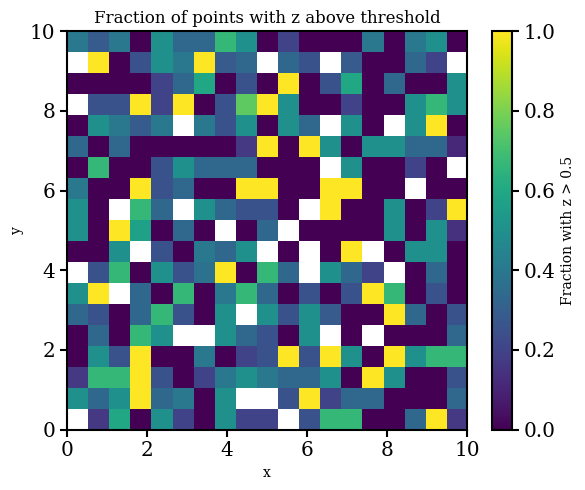

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic_2d

# Example input data
np.random.seed(0)
x = np.random.uniform(0, 10, 1000)      # First quantity
y = np.random.uniform(0, 10, 1000)      # Second quantity
z = np.random.normal(0, 1, 1000)        # Third quantity

# Threshold for third quantity
z_threshold = 0.5

# Mask: whether z > threshold
z_mask = z > z_threshold

# Bin edges (or use number of bins)
xbins = np.linspace(0, 10, 20)
ybins = np.linspace(0, 10, 20)

# Compute the fraction in each 2D bin with z > threshold
# numerator: count of z > threshold in each bin
fraction_numer, _, _, _ = binned_statistic_2d(
    x, y, z_mask.astype(float), statistic='mean', bins=[xbins, ybins]
)

# Plotting
fig, ax = plt.subplots(figsize=(6, 5))
im = ax.imshow(fraction_numer.T, origin='lower', 
               extent=[xbins[0], xbins[-1], ybins[0], ybins[-1]],
               aspect='auto', cmap='viridis', vmin=0, vmax=1)

cbar = plt.colorbar(im, ax=ax)
cbar.set_label(f'Fraction with z > {z_threshold}')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Fraction of points with z above threshold')

plt.tight_layout()
plt.show()


Make another plot where indicating what fraction of objects as a function of initial stellar mass and redshift have a very large different aperture photometry object. Here we could define the large difference as one larger than 1 mag dex?

In [6]:
bgsb_shred = Table.read(f"/pscratch/sd/v/virajvm/catalog_dr1_dwarfs/iron_photometry/iron_BGS_BRIGHT_shreds_catalog_w_aper_mags.fits")
elg_shred = Table.read(f"/pscratch/sd/v/virajvm/catalog_dr1_dwarfs/iron_photometry/iron_ELG_shreds_catalog_w_aper_mags.fits")

# tot_shred = vstack([ bgsb_shred, bgsf_shred, lowz_shred, elg_shred ])

In [25]:
bgsb_sub = bgsb_shred["MAG_R", "MAG_R_APERTURE_COG", "Z", "LOGM_SAGA_APERTURE_COG","FRACFLUX_R", "LOGM_SAGA"]
elg_sub = elg_shred["MAG_R", "MAG_R_APERTURE_COG", "Z", "LOGM_SAGA_APERTURE_COG", "FRACFLUX_R","LOGM_SAGA"]


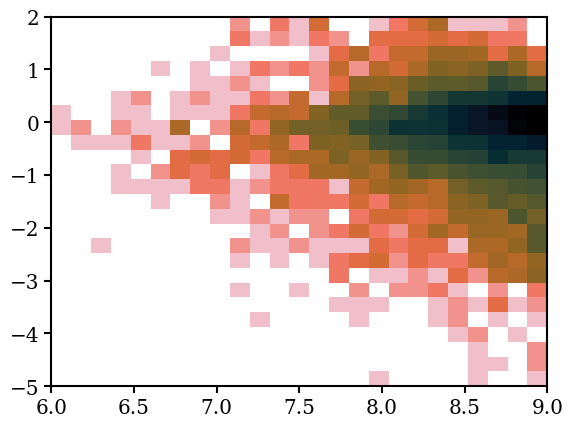

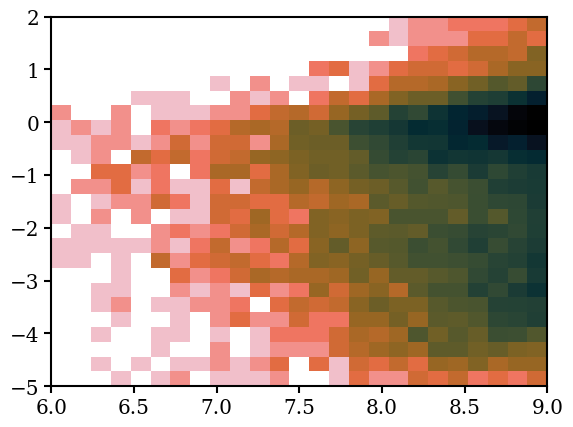

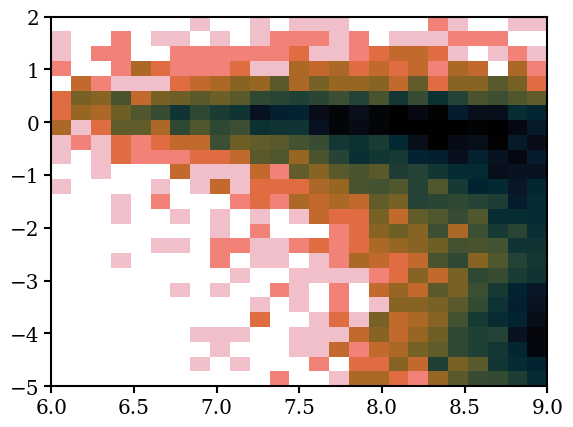

In [27]:
plt.hist2d( bgsb_sub["LOGM_SAGA_APERTURE_COG"].data, bgsb_sub["MAG_R_APERTURE_COG"].data.data - bgsb_sub["MAG_R"].data.data, 
          cmap = cmr.dusk_r, range=( (6,9), (-5,2) ), norm=LogNorm(),bins=25 )
plt.xlim([6,9])
plt.ylim([-5,2])
plt.show()


plt.hist2d( bgsb_sub["LOGM_SAGA"].data, bgsb_sub["MAG_R_APERTURE_COG"].data.data - bgsb_sub["MAG_R"].data.data, 
          cmap = cmr.dusk_r, range=( (6,9), (-5,2) ), norm=LogNorm(),bins=25 )
plt.xlim([6,9])
plt.ylim([-5,2])
plt.show()


plt.hist2d( elg_sub["LOGM_SAGA_APERTURE_COG"].data, elg_sub["MAG_R_APERTURE_COG"].data.data - elg_sub["MAG_R"].data.data, 
          cmap = cmr.dusk_r, range=( (6,9), (-5,2) ), norm=LogNorm(),bins=25 )
plt.xlim([6,9])
plt.ylim([-5,2])
plt.show()



In [ ]:

plt.hist2d( elg_sub["FRACFLUX_R"].data, elg_sub["MAG_R_APERTURE_COG"].data.data - elg_sub["MAG_R"].data.data, 
          cmap = cmr.dusk_r, range=( (1e-2,5), (-5,2) ), norm=LogNorm(),bins=50 )
# plt.xlim([6,9])
plt.ylim([-5,2])
plt.show()

# What targets to select for Scarlet testing

In [25]:
bgsb_cat = Table.read("/pscratch/sd/v/virajvm/catalog_dr1_dwarfs/iron_photometry/iron_BGS_BRIGHT_shreds_catalog_w_aper_mags.fits")
elg_cat = Table.read("/pscratch/sd/v/virajvm/catalog_dr1_dwarfs/iron_photometry/iron_ELG_shreds_catalog_w_aper_mags.fits")



In [26]:
bgsb_lowmass = bgsb_cat[(bgsb_cat["Z"] < 0.01) & (bgsb_cat["LOGM_SAGA_APERTURE_COG"] < 8) & (bgsb_cat["LOGM_SAGA_APERTURE_COG"] > 6) & (bgsb_cat["SGA_D26_NORM_DIST"] > 2)]
print(len(bgsb_lowmass))


elg_lowmass = elg_cat[(elg_cat["Z"] < 0.01) & (elg_cat["LOGM_SAGA_APERTURE_COG"] < 8) & (elg_cat["LOGM_SAGA_APERTURE_COG"] > 6) & (elg_cat["SGA_D26_NORM_DIST"] > 2)]
print(len(elg_lowmass))


297
28


In [13]:
from desi_lowz_funcs import print_radecs

In [34]:
# import numpy as np

# x = np.random.rand(100)
# y = 10 * x + np.random.normal(0, 0.1, size=100)

# # Covariance
# cov_xy = np.cov(x, y)[0, 1]

# # Pearson correlation
# r_xy = np.corrcoef(x, y)[0, 1]

# print("Covariance:", cov_xy)
# print("Pearson r:", r_xy)


In [33]:
# print_radecs(elg_lowmass,ra="RA",dec="DEC")